In [265]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [296]:
im = cv2.imread('doctor-strange-2-benedict-cumberbatch.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)


(464, 825, 3)


<function matplotlib.pyplot.show(*args, **kw)>

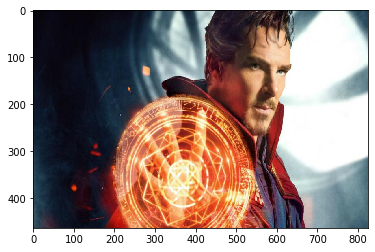

In [297]:
plt.imshow(im,aspect ="auto")
plt.show

In [298]:
all_pixels = im.reshape(-1,3)
print(all_pixels.shape)

(382800, 3)


In [299]:
kn = KMeans(n_clusters = 7)
kn.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [300]:
ko = KMeans(n_clusters = 2)
ko.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [301]:
centers = np.array(km.cluster_centers_,dtype='uint8')
centers_2 = np.array(kn.cluster_centers_,dtype='uint8')
centers_3 = np.array(ko.cluster_centers_,dtype='uint8')


In [302]:
print(centers)


[[211 114  70]
 [ 34  26  37]
 [239 236 224]
 [113 135 144]]


In [303]:
print(centers_2)


[[ 22  22  34]
 [165 185 189]
 [242 189 134]
 [218 112  64]
 [249 251 247]
 [ 85 107 120]
 [133  48  36]]


In [304]:
print(centers_3)

[[222 195 173]
 [ 58  38  44]]


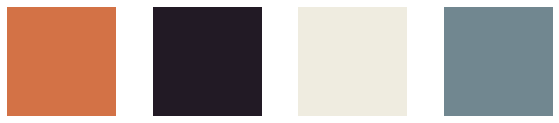

In [305]:
i=1

colors = []


plt.figure(1,figsize = (10,2),facecolor = 'w')

for each_col in centers :
    plt.subplot(1,4,i)
    i+=1
    plt.axis("off")
    
    colors.append(each_col)
    
    a = np.zeros((100,100,3),dtype = 'uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
plt.show()

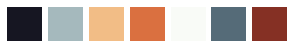

In [364]:
m=1

colors_2 = []


plt.figure(1,figsize = (5,2))

for each_col_2 in centers_2 :
    plt.subplot(1,7,m)
    m+=1
    plt.axis("off")
    
    colors_2.append(each_col_2)
    
    b = np.zeros((50,50,3),dtype = 'uint8')
    b[:,:,:]=each_col_2
    plt.imshow(b)
plt.show()

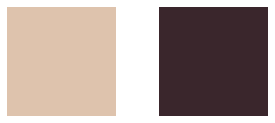

In [390]:
m=1

colors_3 = []


plt.figure(1,figsize = (5,2))

for each_col_2 in centers_3 :
    plt.subplot(1,2,m)
    m+=1
    plt.axis("off")
    
    colors_3.append(each_col_2)
    
    b = np.zeros((50,50,3),dtype = 'uint8')
    b[:,:,:]=each_col_2
    plt.imshow(b)
plt.show()

In [391]:
new_img = np.zeros((464*825,3),dtype = 'uint8')
new_img_2 = np.zeros((464*825,3),dtype = 'uint8')
new_img_3 = np.zeros((464*825,3),dtype = 'uint8')


In [392]:
new_img_3[2000]


array([0, 0, 0], dtype=uint8)

In [393]:
km.labels_


array([1, 1, 1, ..., 1, 3, 3], dtype=int32)

In [394]:
kn.labels_

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

In [395]:
ko.labels_


array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

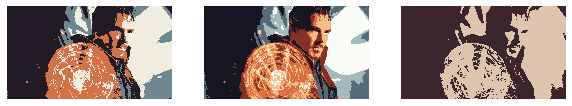

In [396]:


for ix in range(new_img.shape[0]):
    
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))




for ix in range(new_img_2.shape[0]):
    
    new_img_2[ix] = colors_2[kn.labels_[ix]]
    
new_img_2 = new_img_2.reshape((original_shape))


for ix in range(new_img_3.shape[0]):
    
    new_img_3[ix] = colors_3[ko.labels_[ix]]
    
new_img_3 = new_img_3.reshape((original_shape))






plt.figure(figsize = (10,10))

plt.subplot(1,3,1)
plt.imshow(new_img)
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(new_img_2)
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(new_img_3)
plt.axis("off")
plt.show()